In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Loading Datasets:
 Dataset related to wine quality, where different parameters describe various characteristics of the wine. Here’s a breakdown of the key parameters:

Volatile Acidity: Represents the gaseous acids present in wine, which can contribute to off-flavors if in excess.
Fixed Acidity: Refers to the non-volatile acids such as tartaric, succinic, citric, and malic acid.
Residual Sugar: The amount of sugar remaining after fermentation; higher values often indicate a sweeter wine.
Citric Acid: A weak organic acid naturally found in citrus fruits and used to enhance acidity and freshness.
Chlorides: The concentration of salt present in the wine.
Sulfur Dioxide (SO₂): Used to prevent oxidation and microbial spoilage in wine.
pH: Measures the wine’s acidity level, with lower values indicating higher acidity.
Sulphates: Added to help preserve the wine’s freshness and protect it from oxidation and bacterial growth.
Alcohol: The percentage of alcohol present in the wine.
These parameters likely influence the overall quality score of the wine in our dataset.

In [14]:
red_wine = pd.read_csv("winequality-red.csv", sep=";")

In [15]:
white_wine = pd.read_csv("winequality-white.csv", sep=";")


In [16]:
red_wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


white_wine.head(5)

In [17]:
red_wine.shape

(1599, 12)

In [18]:
white_wine.shape

(4898, 12)

#

In [19]:
red_wine['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [20]:
white_wine['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [31]:
red_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [33]:
white_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [34]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [35]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [36]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [37]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


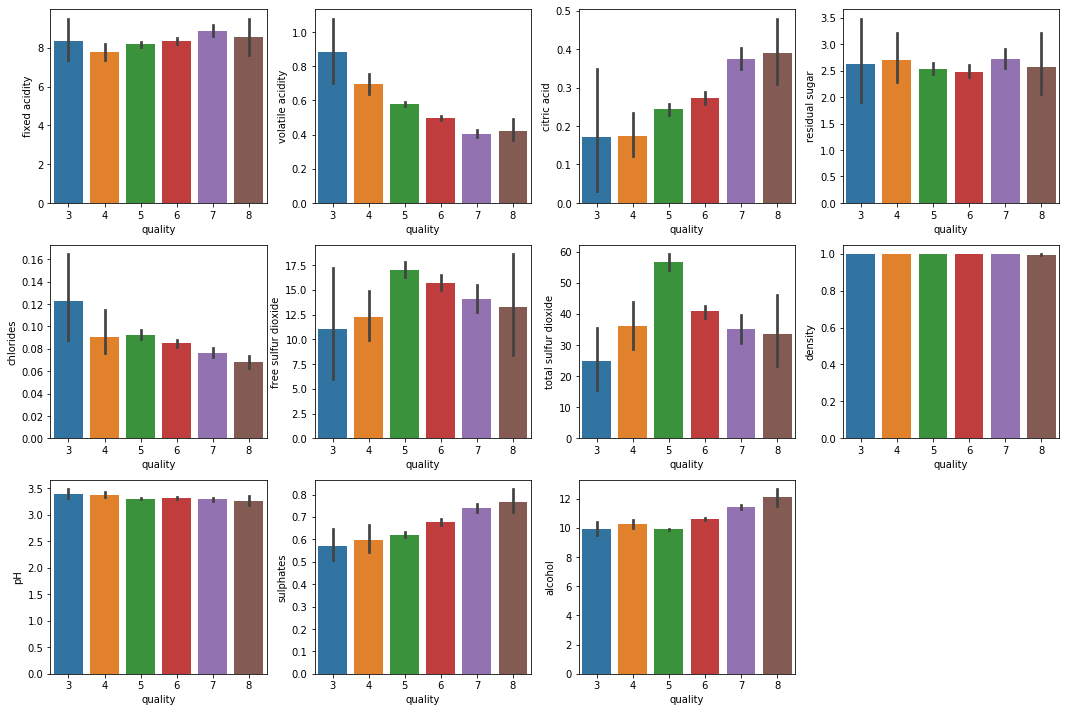

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 10))

# Ensure the column names are correct and match your dataset
plt.subplot(3, 4, 1)
sns.barplot(x='quality', y='fixed acidity', data=red_wine)

plt.subplot(3, 4, 2)
sns.barplot(x='quality', y='volatile acidity', data=red_wine)

plt.subplot(3, 4, 3)
sns.barplot(x='quality', y='citric acid', data=red_wine)

plt.subplot(3, 4, 4)
sns.barplot(x='quality', y='residual sugar', data=red_wine)

plt.subplot(3, 4, 5)
sns.barplot(x='quality', y='chlorides', data=red_wine)

plt.subplot(3, 4, 6)
sns.barplot(x='quality', y='free sulfur dioxide', data=red_wine)

plt.subplot(3, 4, 7)
sns.barplot(x='quality', y='total sulfur dioxide', data=red_wine)

plt.subplot(3, 4, 8)
sns.barplot(x='quality', y='density', data=red_wine)

plt.subplot(3, 4, 9)
sns.barplot(x='quality', y='pH', data=red_wine)

plt.subplot(3, 4, 10)
sns.barplot(x='quality', y='sulphates', data=red_wine)

plt.subplot(3, 4, 11)
sns.barplot(x='quality', y='alcohol', data=red_wine)

# Show the plot
plt.tight_layout()
plt.show()


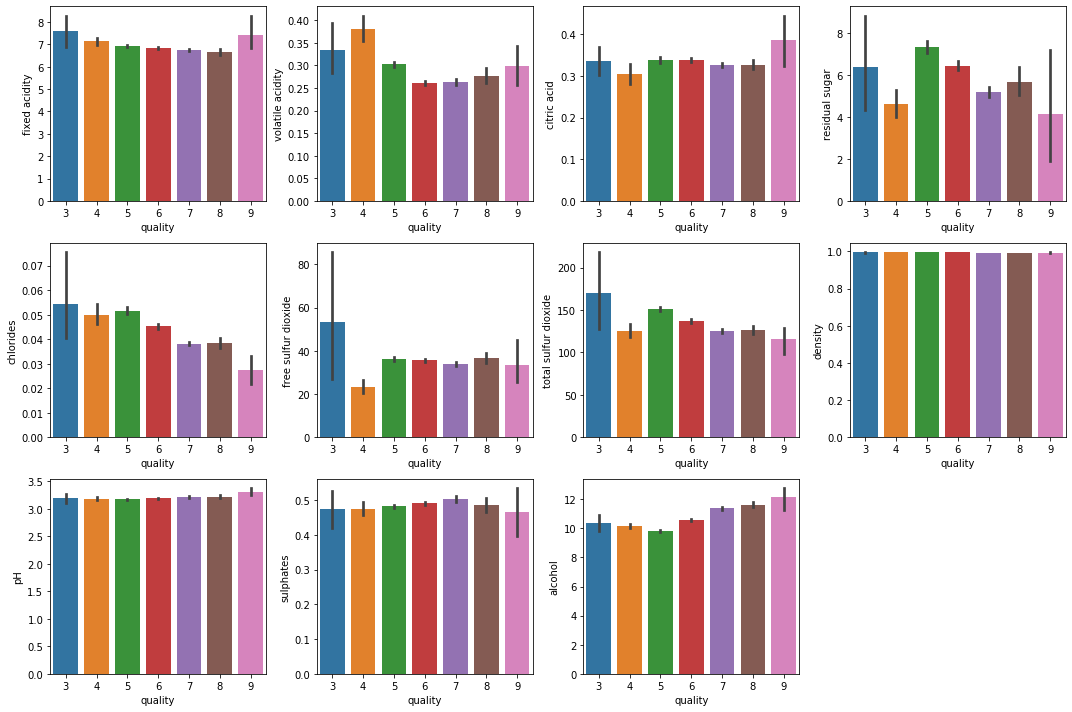

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 10))

# Ensure the column names are correct and match your dataset
plt.subplot(3, 4, 1)
sns.barplot(x='quality', y='fixed acidity', data=white_wine)

plt.subplot(3, 4, 2)
sns.barplot(x='quality', y='volatile acidity', data=white_wine)

plt.subplot(3, 4, 3)
sns.barplot(x='quality', y='citric acid', data=white_wine)

plt.subplot(3, 4, 4)
sns.barplot(x='quality', y='residual sugar', data=white_wine)

plt.subplot(3, 4, 5)
sns.barplot(x='quality', y='chlorides', data=white_wine)

plt.subplot(3, 4, 6)
sns.barplot(x='quality', y='free sulfur dioxide', data=white_wine)

plt.subplot(3, 4, 7)
sns.barplot(x='quality', y='total sulfur dioxide', data=white_wine)

plt.subplot(3, 4, 8)
sns.barplot(x='quality', y='density', data=white_wine)

plt.subplot(3, 4, 9)
sns.barplot(x='quality', y='pH', data=white_wine)

plt.subplot(3, 4, 10)
sns.barplot(x='quality', y='sulphates', data=white_wine)

plt.subplot(3, 4, 11)
sns.barplot(x='quality', y='alcohol', data=white_wine)

# Show the plot
plt.tight_layout()
plt.show()


In [33]:
red_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [34]:
white_wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

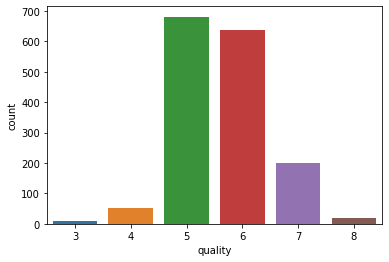

In [35]:
sns.countplot(x='quality',data=red_wine)

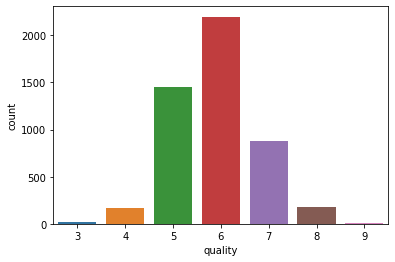

In [36]:
sns.countplot(x='quality',data=white_wine)

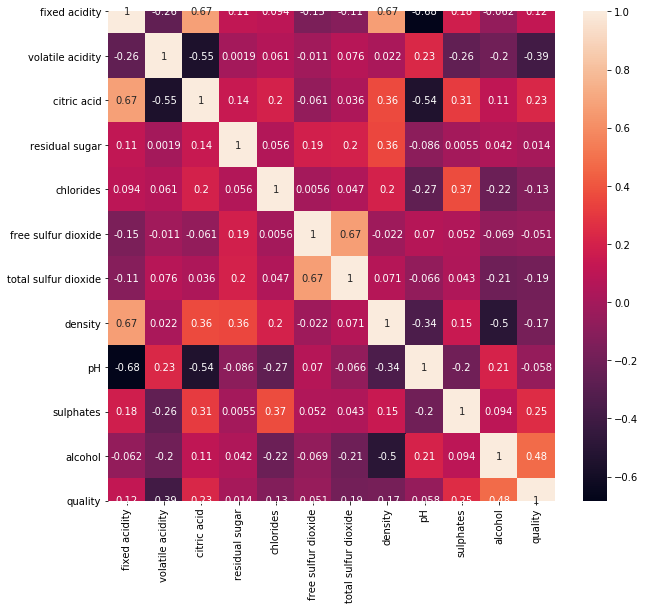

In [37]:
plt.figure(figsize=(10,9))
sns.heatmap(red_wine.corr(),annot=True)

In [39]:
# Display the correlation matrix of the red_wine dataset
red_corr = red_wine.corr()

# Loop through the correlation matrix to find highly correlated features
for i in range(0, len(red_wine.columns)):
    for j in range(0, len(red_wine.columns)):
        if abs(red_corr.iloc[i, j]) >= 0.5 and i != j:  # Avoid self-correlation
            print(red_wine.columns[i], ",", red_wine.columns[j], "(", i, ",", j, ")")


fixed acidity , citric acid ( 0 , 2 )
fixed acidity , density ( 0 , 7 )
fixed acidity , pH ( 0 , 8 )
volatile acidity , citric acid ( 1 , 2 )
citric acid , fixed acidity ( 2 , 0 )
citric acid , volatile acidity ( 2 , 1 )
citric acid , pH ( 2 , 8 )
free sulfur dioxide , total sulfur dioxide ( 5 , 6 )
total sulfur dioxide , free sulfur dioxide ( 6 , 5 )
density , fixed acidity ( 7 , 0 )
pH , fixed acidity ( 8 , 0 )
pH , citric acid ( 8 , 2 )


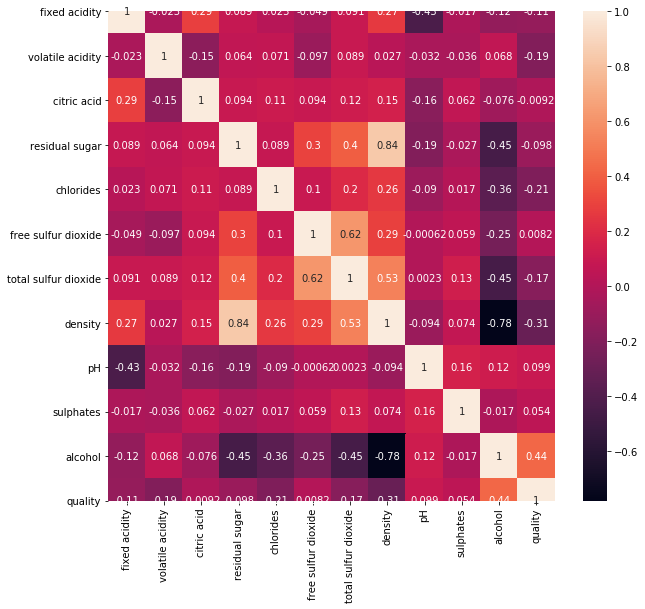

In [40]:
plt.figure(figsize=(10,9))
sns.heatmap(white_wine.corr(),annot=True)

In [42]:
# Display the correlation matrix of the red_wine dataset
white_corr = white_wine.corr()

# Loop through the correlation matrix to find highly correlated features
for i in range(0, len(white_wine.columns)):
    for j in range(0, len(white_wine.columns)):
        if abs(white_corr.iloc[i, j]) >= 0.5 and i != j:  # Avoid self-correlation
            print(white_wine.columns[i], ",", white_wine.columns[j], "(", i, ",", j, ")")


residual sugar , density ( 3 , 7 )
free sulfur dioxide , total sulfur dioxide ( 5 , 6 )
total sulfur dioxide , free sulfur dioxide ( 6 , 5 )
total sulfur dioxide , density ( 6 , 7 )
density , residual sugar ( 7 , 3 )
density , total sulfur dioxide ( 7 , 6 )
density , alcohol ( 7 , 10 )
alcohol , density ( 10 , 7 )


In [44]:
# Add a 'rating' column based on the 'quality' column
red_wine['rating'] = red_wine['quality'].apply(lambda x: 'Good' if x >=6 else 'Cheap')

# Display the first few rows of the updated dataframe
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cheap
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cheap
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap


In [45]:
# Add a 'rating' column based on the 'quality' column
white_wine['rating'] = white_wine['quality'].apply(lambda x: 'Good' if x >=6 else 'Cheap')

# Display the first few rows of the updated dataframe
white_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good


In [46]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'rating' column and store it in a new 'target' column
red_wine['target'] = label_encoder.fit_transform(red_wine['rating'])

# Display the first few rows of the updated dataframe
red_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Cheap,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Cheap,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Good,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Cheap,0


In [48]:


# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to the 'rating' column and store it in a new 'target' column
white_wine['target'] = label_encoder.fit_transform(white_wine['rating'])

# Display the first few rows of the updated dataframe
white_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,Good,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,Good,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,Good,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,Good,1


1    855
0    744
Name: target, dtype: int64


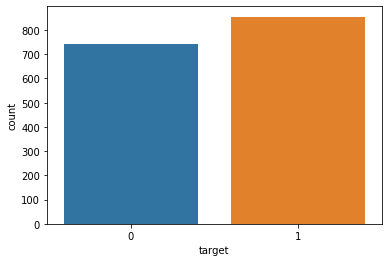

In [50]:
import seaborn as sns

# Create a countplot for the 'target' column
sns.countplot(x=red_wine['target'], data=red_wine)

# Print the value counts for the 'target' column
print(red_wine['target'].value_counts())


1    3258
0    1640
Name: target, dtype: int64


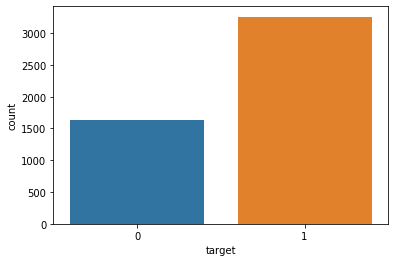

In [51]:
import seaborn as sns

# Create a countplot for the 'target' column
sns.countplot(x=white_wine['target'], data=white_wine)

# Print the value counts for the 'target' column
print(white_wine['target'].value_counts())


.# Count of white wine shows that there is a need to balance the dataset

Balancing the two classes:

Good quality wine: wine['quality'] == 1
Bad quality wine: wine['quality'] == 0
In this step, we are simply balancing our dataset. We are making a new data frame good_quality, in which we will have data of just good quality wine, or we can say where the quality is 1. Similarly, we are making one for bad quality wine.

Then we are simply shuffling good quality data using df.sample(frac=1). This means shuffling the data and taking a 100% fraction of the data.

Then we are taking out 1640 samples of good quality wine because we have just 1640 samples of bad quality wine. Finally, we are joining both 1640 samples of each class, and our final data frame will have 3280 rows. After that, we shuffle the data again.



In [55]:
# Separate good and bad quality wines based on the 'target' column
good_quality = white_wine[white_wine['target'] == 1]
bad_quality = white_wine[white_wine['target'] == 0]

# Balance the dataset by taking an equal number of samples from both classes
# Shuffle the good quality data and then take the first 1640 rows
good_quality = good_quality.sample(frac=1, random_state=42).iloc[:1640]  # Randomly shuffle and take 1640 samples

# Concatenate the good and bad quality samples
new_white = pd.concat([good_quality, bad_quality])

# Shuffle the new dataset
new_white = new_white.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the balanced dataset
new_white


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,target
0,8.1,0.200,0.30,1.30,0.036,7.0,49.0,0.99242,2.99,0.73,10.3,5,Cheap,0
1,5.3,0.760,0.03,2.70,0.043,27.0,93.0,0.99320,3.34,0.38,9.2,5,Cheap,0
2,6.5,0.310,0.14,7.50,0.044,34.0,133.0,0.99550,3.22,0.50,9.5,5,Cheap,0
3,5.6,0.205,0.16,12.55,0.051,31.0,115.0,0.99564,3.40,0.38,10.8,6,Good,1
4,9.8,0.360,0.45,1.60,0.042,11.0,124.0,0.99440,2.93,0.46,10.8,5,Cheap,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3275,6.7,0.310,0.30,2.10,0.038,18.0,130.0,0.99280,3.36,0.63,10.6,6,Good,1
3276,7.1,0.260,0.37,5.50,0.025,31.0,105.0,0.99082,3.06,0.33,12.6,8,Good,1
3277,6.6,0.260,0.27,11.80,0.048,28.0,112.0,0.99606,2.87,0.49,9.7,6,Good,1
3278,7.2,0.340,0.20,5.80,0.062,52.0,203.0,0.99461,3.17,0.44,9.8,6,Good,1


In [56]:
new_white['target'].value_counts()

1    1640
0    1640
Name: target, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns from red_wine and prepare the feature set and target variable
Xr = red_wine.drop(['quality', 'target', 'rating', 'fixed acidity', 'pH', 'free sulfur dioxide'], axis=1)
yr = red_wine['target']

# Split the dataset into training and testing sets (70% training, 30% testing)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.3, random_state=100)


In [111]:
# Drop unnecessary columns from new_white and prepare the feature set and target variable
Xw = new_white.drop(['quality', 'target', 'rating', 'density', 'free sulfur dioxide'], axis=1)
yw = new_white['target']

# Split the dataset into training and testing sets (70% training, 30% testing)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.3, random_state=100)


In [112]:
len(yw_test)

984

In [113]:
Xr_train.head()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,sulphates,alcohol
858,0.28,0.47,1.70,0.054,32.0,0.99686,0.67,10.6
654,0.47,0.47,2.40,0.074,29.0,0.99790,0.46,9.5
721,0.48,0.24,2.85,0.094,106.0,0.99820,0.53,9.2
176,0.38,0.21,2.00,0.080,35.0,0.99610,0.47,9.5
692,0.49,0.51,2.00,0.422,62.0,0.99790,1.17,9.0


In [114]:

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
norm_xr_train = scaler.fit_transform(Xr_train)

# Transform the test data using the same scaler
norm_xr_test = scaler.transform(Xr_test)

# Display the normalized training data
print(norm_xr_train)


[[0.10958904 0.47       0.05479452 ... 0.49853157 0.18404908 0.39285714]
 [0.23972603 0.47       0.10273973 ... 0.57488987 0.05521472 0.19642857]
 [0.24657534 0.24       0.13356164 ... 0.5969163  0.09815951 0.14285714]
 ...
 [0.34589041 0.2        0.04109589 ... 0.52349486 0.4601227  0.125     ]
 [0.33561644 0.02       0.10958904 ... 0.54185022 0.14110429 0.23214286]
 [0.17123288 0.43       0.09589041 ... 0.39867841 0.26993865 0.5       ]]


In [115]:
norm_Xwtrain = scaler.fit_transform(Xw_train)
norm_Xw_test = scaler.transform(Xw_test)
print(norm_Xw_test)

[[0.43421053 0.11413043 0.49       ... 0.61       0.29761905 0.44628099]
 [0.36842105 0.23369565 0.51       ... 0.28       0.35714286 0.26446281]
 [0.44736842 0.08152174 0.44       ... 0.32       0.63095238 0.38016529]
 ...
 [0.35526316 0.25543478 0.13       ... 0.44       0.17857143 0.19834711]
 [0.43421053 0.24456522 0.51       ... 0.27       0.45238095 0.24793388]
 [0.31578947 0.19021739 0.31       ... 0.41       0.19047619 0.21487603]]


In [116]:
yr.value_counts()

1    855
0    744
Name: target, dtype: int64

In [117]:
yw.value_counts()

1    1640
0    1640
Name: target, dtype: int64

In [118]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [119]:
import xgboost as xgb


In [120]:

from xgboost import XGBClassifier  # This should work now

# Define a dictionary to store the model types
model_types = {
    "LR": LogisticRegression(solver='liblinear'),
    "RFC": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=8, algorithm='kd_tree'),
    "GNB": GaussianNB(),
    "XGBoost": XGBClassifier(n_estimators=250, learning_rate=0.25, use_label_encoder=False) #Extreme Gradient Boosting Technology
}
# Ensemble learning refers to methods that create multiple models (often called "weak learners") and combine their predictions to produce a more accurate and robust model



In [121]:

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize StratifiedKFold with 5 splits
skfold = StratifiedKFold(n_splits=5)

# Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

# Perform cross-validation and get scores
#scores = cross_val_score(model, X, y, cv=skfold)

# Print the scores
#print(np.mean(scores))  # Print the mean of the cross-validation scores


In [122]:
def fit_and_score(model_types, X_train, y_train, X_test, y_test):
    model_scores = {}
    scores = {}
    trained_models = {}

    for name, model in model_types.items():
        # Fit the model to the training data
        trained_models[name] = model.fit(X_train, y_train)
        
        # Evaluate the model using cross-validation and store the scores
        scores[name] = cross_val_score(model, X_train, y_train, cv=5)  # Keep cv here
        
        # Predict and evaluate the model on the test data
        model_scores[name] = model.score(X_test, y_test)

    return model_scores, trained_models, scores


In [123]:
# Call the fit_and_score function
m_scores, train_model, accuracy = fit_and_score(
    model_types=model_types,  # Ensure modelstypes is defined correctly
    X_train=Xw_train, 
    y_train=yw_train, 
    X_test=Xw_test, 
    y_test=yw_test      
)

# Print the scores for each model
print(m_scores)


[12:32:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[12:32:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation me

In [124]:
print(accuracy)

{'LR': array([0.71521739, 0.69934641, 0.71023965, 0.73856209, 0.7124183 ]), 'RFC': array([0.78478261, 0.76470588, 0.79084967, 0.80392157, 0.80827887]), 'KNN': array([0.66521739, 0.66666667, 0.66448802, 0.61437908, 0.63398693]), 'GNB': array([0.68913043, 0.70152505, 0.70588235, 0.708061  , 0.69281046]), 'XGBoost': array([0.74130435, 0.77124183, 0.79738562, 0.77559913, 0.78649237])}


In [125]:

# Create the model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.25, use_label_encoder=False)

# Fit the model with early stopping
xgb.fit(
    Xr_train, 
    yr_train, 
    eval_set=[(Xr_test, yr_test)], 
    early_stopping_rounds=10,  # Change None to a specific number (e.g., 10)
    verbose=False
)

# Get the score
score = xgb.score(Xr_test, yr_test)
print("Score:", score)


[12:36:20] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score: 0.7791666666666667


In [127]:
xgb.fit(Xw_train, yw_train, eval_set=[(Xw_test, yw_test)], early_stopping_rounds=10, verbose=False)
score = xgb.score(Xw_test, yw_test)  # Assuming you want to score on the white wine test set
print("Score:", score)



[12:43:22] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Score: 0.7439024390243902


[12:51:01] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      predicted_values  original_values
1254                 1                0
1087                 1                1
822                  0                0
1514                 0                1
902                  1                1


In [136]:
xgbwhite = XGBClassifier(n_estimators=100, learning_rate=0.25, use_label_encoder=False)
xgbwhite.fit(Xw_train, yw_train)

xw_predict = xgbwhite.predict(Xw_test)

white_predicted_df = {'predicted_values': xw_predict, 'original_values': yw_test}

# Creating new dataframe
predicted_df = pd.DataFrame(white_predicted_df)

# Printing
print(predicted_df.head())


[12:52:36] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
      predicted_values  original_values
2033                 1                1
2690                 0                1
408                  1                1
1841                 1                1
855                  1                1


In [140]:
print(classification_report(yr_test, xr_predict))


              precision    recall  f1-score   support

           0       0.78      0.79      0.79       224
           1       0.82      0.81      0.81       256

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



In [141]:
print(classification_report(yw_test, xw_predict))


              precision    recall  f1-score   support

           0       0.75      0.79      0.77       489
           1       0.78      0.74      0.76       495

    accuracy                           0.76       984
   macro avg       0.76      0.76      0.76       984
weighted avg       0.76      0.76      0.76       984



In [142]:
# Confusion matrix for red wine predictions
print(confusion_matrix(yr_test, xr_predict))

# Confusion matrix for white wine predictions
print(confusion_matrix(yw_test, xw_predict))

[[178  46]
 [ 49 207]]
[[385 104]
 [128 367]]


In [143]:
param = {'n_estimators': [50, 100, 500]}
grid_rf = GridSearchCV(RandomForestClassifier(), param, scoring="accuracy", cv=10)

grid_rf.fit(Xr_train, yr_train)

print('Best parameters:', grid_rf.best_params_)

# Wine Quality Prediction
pred = grid_rf.predict(Xr_test)

print(confusion_matrix(yr_test, pred))

print('\n')

print(classification_report(yr_test, pred))

print('\n')

print(accuracy_score(yr_test, pred))


Best parameters: {'n_estimators': 500}
[[168  56]
 [ 44 212]]


              precision    recall  f1-score   support

           0       0.79      0.75      0.77       224
           1       0.79      0.83      0.81       256

    accuracy                           0.79       480
   macro avg       0.79      0.79      0.79       480
weighted avg       0.79      0.79      0.79       480



0.7916666666666666


In [144]:
import pickle

pickle.dump(xgb, open('wine_quality.pkl', 'wb'))

model = pickle.load(open('wine_quality.pkl', 'rb'))


In [145]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.25, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)